# YOLOv5 Instance Segmentation Tutorial

YOLOv5 supports instance segmentation tasks too. This is the official YOLOv5 instance segmentation notebook tutorial. YOLOv5 is maintained by [Ultralytics](https://github.com/ultralytics/yolov5).

This notebook covers:

*   Inference with out-of-the-box YOLOv5 instance segmentation on COCO-128 Segmentatation
*  [Training YOLOv5 instance segmentation](https://blog.roboflow.com//train-yolov5-instance-segmentation-custom-dataset) on custom data

*Looking for custom data? Explore over 66M community datasets on [Roboflow Universe](https://universe.roboflow.com).*

This notebook was created with Google Colab. [Click here](https://colab.research.google.com/drive/1JTz7kpmHsg-5qwVz2d2IH3AaenI1tv0N?usp=sharing) to run it.

# 0. Setup
Pull in respective libraries to prepare the notebook environment

In [ ]:
# save the working directory path for later use

import os
HOME = os.getcwd()
print(HOME)

c:\Users\Nil\VscodeProjects\My_yolo


In [ ]:
# clone project repository and install dependencies
# Clone
!git clone https://github.com/ultralytics/yolov5.git
%cd {HOME}/yolov5

# Install
%pip install -r requirements.txt

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5  v7.0-295-gac6c4383 Python-3.12.2 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)


Setup complete  (12 CPUs, 15.8 GB RAM, 245.2/475.8 GB disk)


In [ ]:
# download pretrained weights

from utils.downloads import attempt_download

p5 = ['n', 's', 'm', 'l', 'x']  # P5 models
cls = [f'{x}-seg' for x in p5]  # segmentation models

for x in cls:
    attempt_download(f'{HOME}/yolov5/weights/yolov5{x}.pt')

100%|██████████| 4.11M/4.11M [00:00<00:00, 28.4MB/s]

100%|██████████| 14.9M/14.9M [00:00<00:00, 48.9MB/s]

100%|██████████| 42.4M/42.4M [00:00<00:00, 45.6MB/s]

100%|██████████| 91.9M/91.9M [00:02<00:00, 38.8MB/s]

100%|██████████| 170M/170M [00:03<00:00, 52.5MB/s] 



# 1. Inference on test image

To demonstrate YOLOv5 instance segmentation, we'll leverage an already trained model. In this case, we'll download the COCO-128 trained models pretrained on COCO-128 using YOLOv5 Utils.

If you'd like to skip to custom trainining, jump to section 3 below.

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/bus.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=test-inference, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/data/images/bus.jpg: 640x480 4 persons, 1 bus, 224.2ms
Speed: 0.9ms pre-process, 224.2ms inference, 1991.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/test-inference


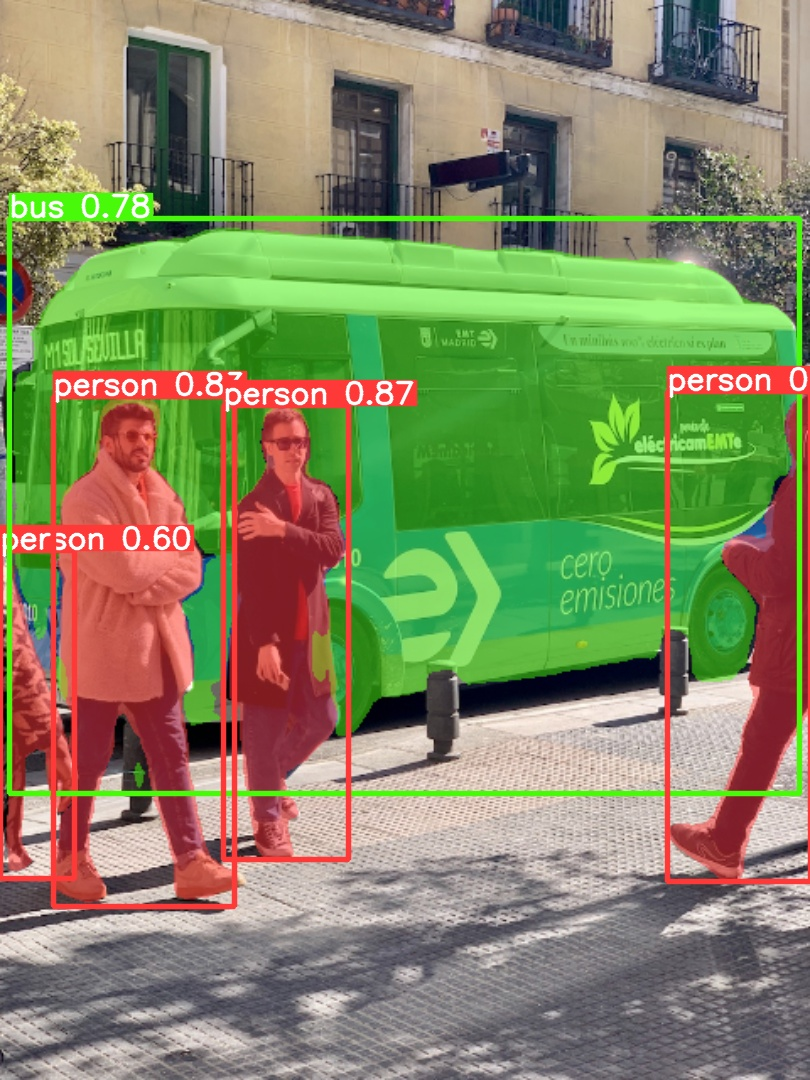

In [ ]:
# infer using segment/predict.py

%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/bus.jpg --name test-inference
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/test-inference/bus.jpg", width=600)

# 2. Infer on COCO image

In [ ]:
#Download example image
import requests

#image_url = "https://i.imgur.com/EbOBS5l.jpg" #results in too many requests
image_url = "https://th.bing.com/th/id/R.017cabeaa57c0a98f1b1510e22f46a1b?rik=V2naR%2fXaD871KA&riu=http%3a%2f%2f3.bp.blogspot.com%2f-4kA3WJ8AAnE%2fUZxhSQpFyMI%2fAAAAAAAAAVw%2fEHLP1Id89Zc%2fs1600%2fGrants-Zebra.jpg&ehk=K6%2btmrYFKAzmLcqMr9X%2bof56IK2aJxZ%2bzkAyXdovJ8k%3d&risl=&pid=ImgRaw&r=0"

response = requests.get(image_url)
response.raise_for_status()
with open(f"{HOME}/yolov5/data/images/zebra.jpg", "wb") as handler:
    handler.write(response.content)

/content/yolov5
segment/predict: weights=['weights/yolov5s-seg.pt'], source=data/images/zebra.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=coco, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs
image 1/1 /content/yolov5/data/images/zebra.jpg: 448x640 1 zebra, 60.5ms
Speed: 0.5ms pre-process, 60.5ms inference, 511.8ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/predict-seg/coco


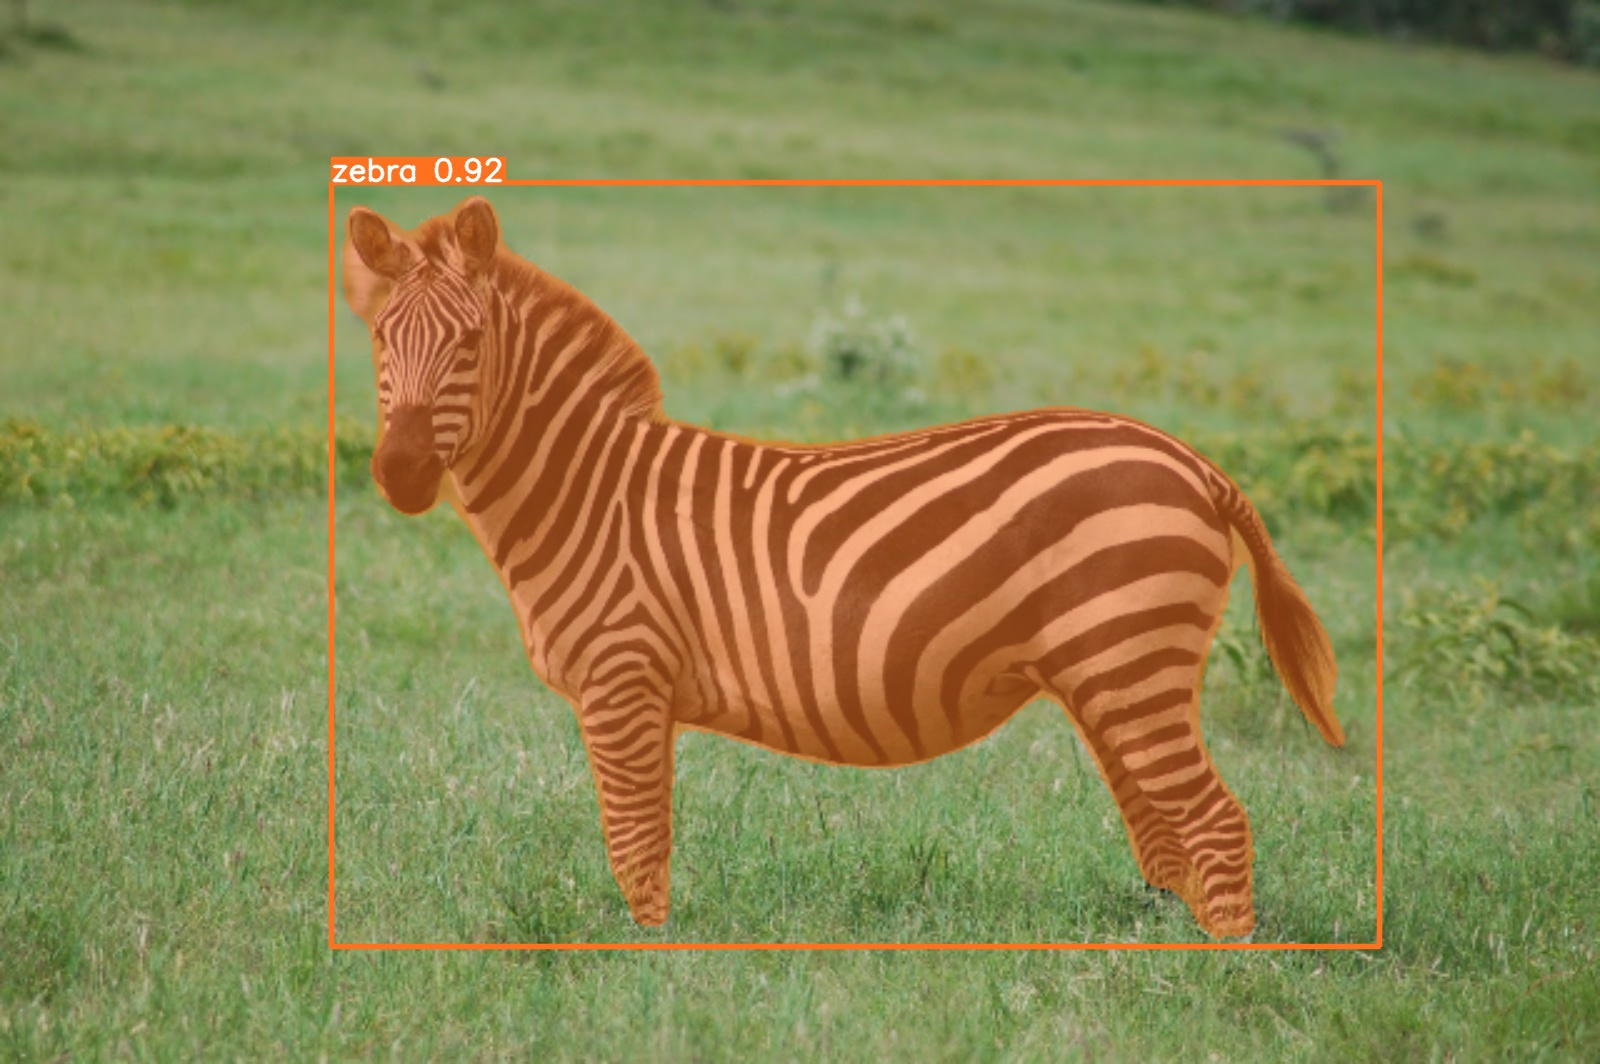

In [ ]:
#Infer using segment/predict.py
%cd {HOME}/yolov5
!python segment/predict.py --weights weights/yolov5s-seg.pt --source data/images/zebra.jpg --name coco
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/coco/zebra.jpg", width=600)

The image with a zebra is classified as a zebra with a 92% confidence level.

## 3. (Optional) Validate

Use the `segment/val.py` script to run validation for the model. This will show us the model's performance.

First, we need to download COCO-128.

In [ ]:
torch.hub.download_url_to_file("https://ultralytics.com/assets/coco128-seg.zip", f"{HOME}/tmp.zip")
!unzip -q {HOME}/tmp.zip -d {HOME}/yolov5/datasets
!rm {HOME}/tmp.zip

100%|██████████| 6.79M/6.79M [00:00<00:00, 25.4MB/s]


replace /content/yolov5/datasets/coco128-seg/LICENSE? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights yolov5s-seg.pt --data coco128-seg.yaml --img 640 --name coco

/content/yolov5
segment/val: data=/content/yolov5/data/coco128-seg.yaml, weights=['yolov5s-seg.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=coco, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

100% 14.9M/14.9M [00:00<00:00, 331MB/s]

Fusing layers... 
YOLOv5s-seg summary: 224 layers, 7611485 parameters, 0 gradients, 26.4 GFLOPs

Dataset not found ⚠️, missing paths ['/content/datasets/coco128-seg/images/train2017']
100% 6.79M/6.79M [00:00<00:00, 284MB/s]
Dataset download success ✅ (2.4s), saved to /content/datasets
val: Scanning /content/datasets/coco128-seg/labels/train2017... 126 images, 2 backgrounds, 0 corrupt: 100% 128/128 [00:00<00:00, 955.45it/s]
val: New cache created: /content/datasets/coco128-s

The output shows performance metrics for the COCO-128 validation dataset.

# 4. Train On Custom Data

To train on custom data, we need to prepare a dataset with custom labels.

To prepare custom data, we'll use [Roboflow](https://roboflow.com). Roboflow enables easy dataset prep with your team, including labeling, formatting into the right export format, deploying, and active learning with a `pip` package.

If you need custom data, there are over 66M open source images from the community on [Roboflow Universe](https://universe.roboflow.com).

(For more guidance, here's a detailed blog on [training YOLOv5 instance segmentation on custom data](https://blog.roboflow.com/train-yolov5-instance-segmentation-custom-dataset).)


Create a free Roboflow account, upload your data, and label.

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-annotation.gif)

### Load Custom Dataset

Next, we'll export our dataset into the right directory structure for training YOLOv5 segmentation to load into this notebook. Select the `Export` button at the top of the version page, `YOLO v5 Pytorch` type, and `show download code`.

This ensures all our directories are in the right format with the needed data.yaml file:

```
dataset
├── train
│   ├── images
│   │   ├── IMG_123.jpg
│   └── labels
│       ├── IMG_123.txt
├── valid
│   ├── images
│   │   ├── IMG_456.jpg
│   └── labels
│       ├── IMG_456.txt
├── test
│   ├── images
│   │   ├── IMG_789.jpg
│   └── labels
│       ├── IMG_789.txt
├── data.yaml
├── README.roboflow.txt
```

![](https://robflow-public-assets.s3.amazonaws.com/how-to-train-yolov5-segmentation-format.gif)


Copy and paste that snippet into the cell below.

In [ ]:
%cd {HOME}/yolov5
!pip install roboflow

from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR API KEY")
rf = Roboflow(api_key="V1enjxaNhwJarLPxQFSQ") # Keycaps

project = rf.workspace("paul-guerrie-tang1").project("asl-poly-instance-seg")
dataset = project.version(24).download("yolov5")

/content/yolov5
loading Roboflow workspace...
loading Roboflow project...


In [ ]:
# Use on Colab
#%cat {dataset.location}/data.yaml

# Use on local Machine
with open(f'{dataset.location}/data.yaml', 'r') as file:
    lables = file.read()
print(lables)

names:
- A
- B
- C
- D
- E
- F
- G
- H
- I
- J
- K
- L
- M
- N
- O
- P
- Q
- R
- S
- T
- U
- V
- W
- X
- Y
- Z
nc: 26
train: ASL-Poly-Instance-Seg-24/train/images
val: ASL-Poly-Instance-Seg-24/valid/images


### Train On Custom Data 🎉
Here, we use the `dataset.location` attribute to pass our dataset to the `--data` parameter.

Note: we're training for 100 epochs here. We're also starting training from the pretrained weights. Larger datasets will likely benefit from longer training.

/content/yolov5
2024-03-28 13:54:40.814197: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-28 13:54:40.814258: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-28 13:54:40.816238: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
segment/train: weights=yolov5s-seg.pt, cfg=, data=/content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=100, batch_size=128, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, s

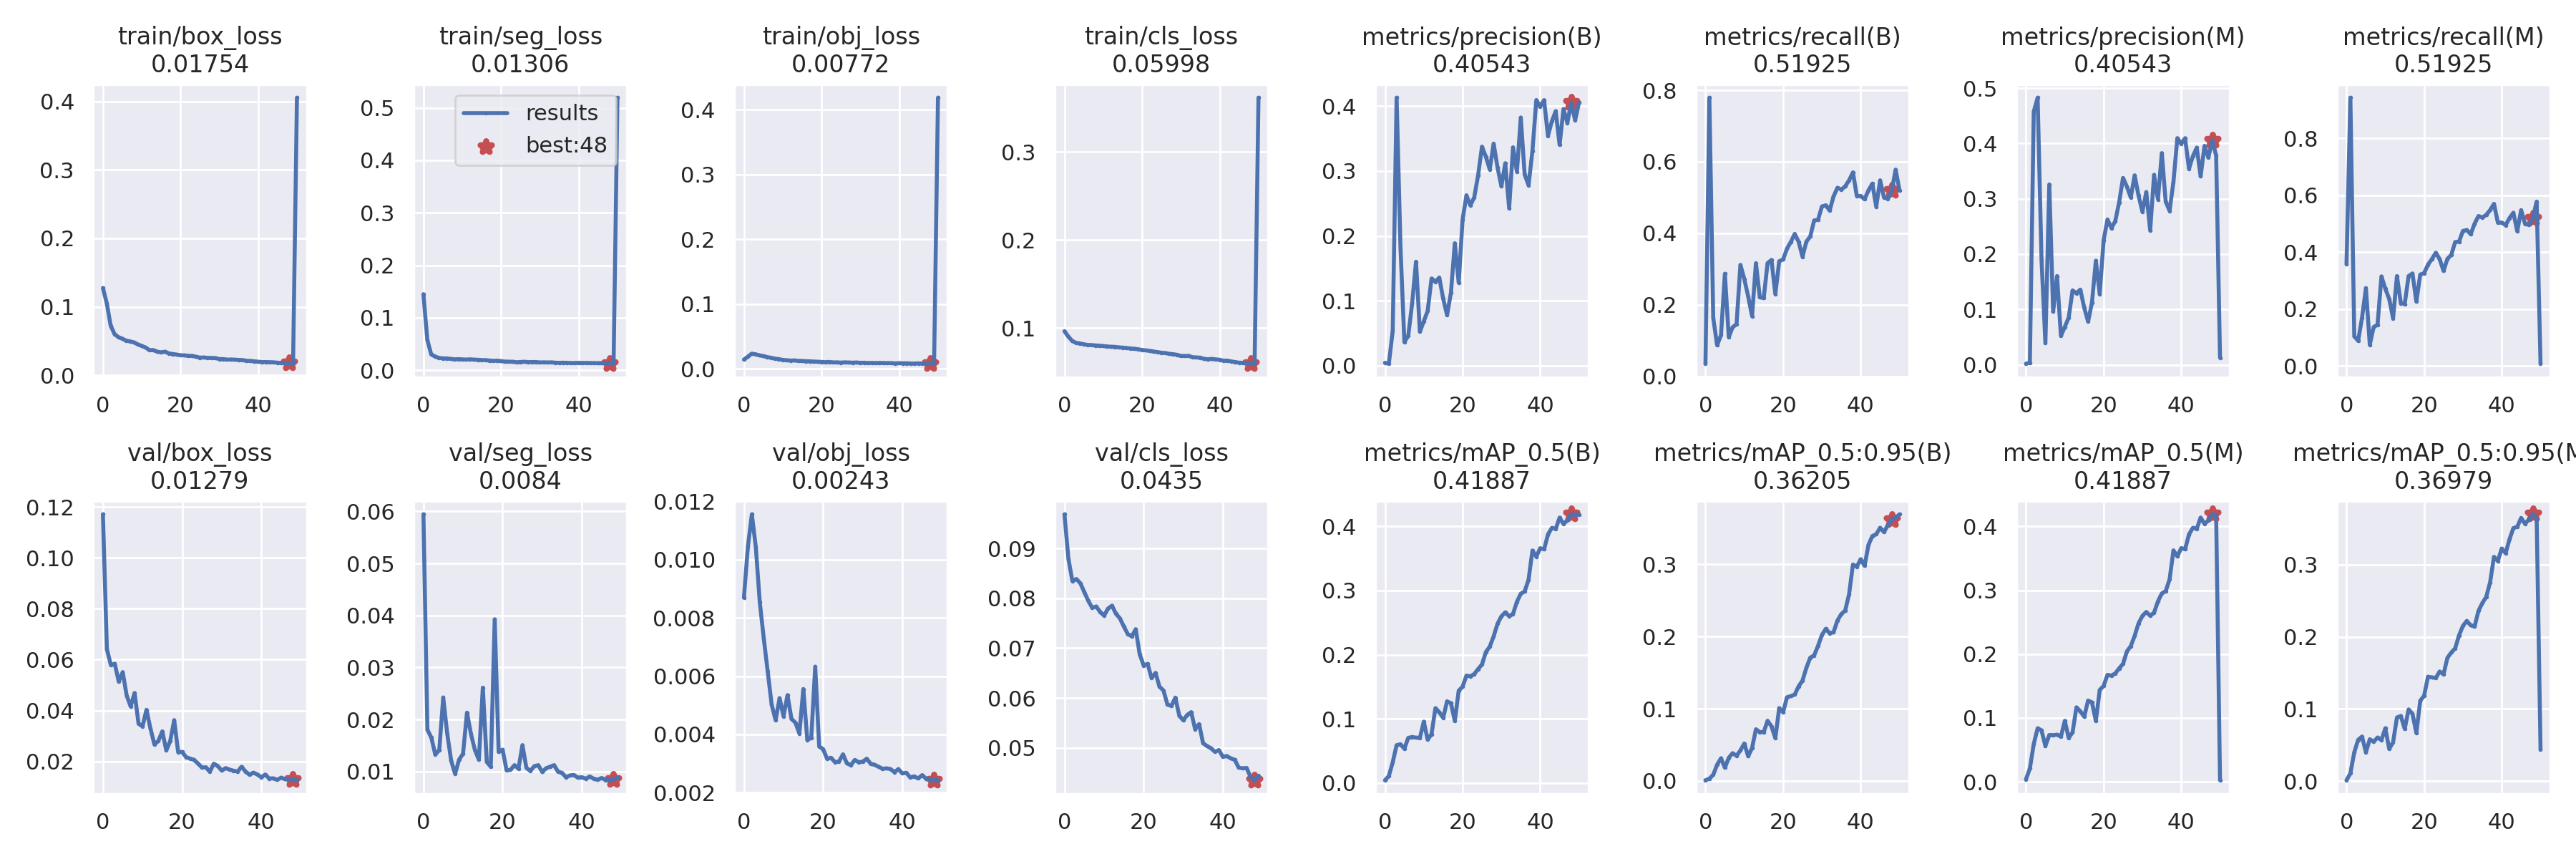

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 320 --batch 128 --epochs 100 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name custom-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/custom-dataset/results.png', width=1200)

Above we see training plots for our custom trained model. This plot along with other detailed results and sample predictions are all automatically generated and stored in the `runs` folder. See `runs/train-seg/exp`.

***The graph overall showed performance of the model, it showed a low score on the metrics of Mean Average Precision (mAP) which is the Intersection Over Union metrics of the model at a threshold if 0.5; it also showed a lower scoer on thresholds 0.5-0.9. Having a high score on these metrics would mean that the model is detecting correctly since the higher the IoU the closer the ground truth and the prediction is.***

### Validate Your Custom Model

Repeat step 2 from above to test and validate your custom model.

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 320  --name custom-dataset

/content/yolov5
segment/val: data=/content/yolov5/ASL-Poly-Instance-Seg-24/data.yaml, weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], batch_size=32, imgsz=320, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val-seg, name=custom-dataset, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
val: Scanning /content/yolov5/ASL-Poly-Instance-Seg-24/valid/labels.cache... 334 images, 0 backgrounds, 0 corrupt: 100% 334/334 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 11/11 [00:08<00:00,  1.23it/s]
                   all        334        334

### Infer With Your Custom Model

/content/yolov5
segment/predict: weights=['/content/yolov5/runs/train-seg/custom-dataset/weights/best.pt'], source=/content/yolov5/ASL-Poly-Instance-Seg-24/test/images/N3_jpg.rf.974e7f8c3a826e804b75816ba1a719e3.jpg, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=custom-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
Model summary: 165 layers, 7465847 parameters, 0 gradients, 25.9 GFLOPs
WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/1 /content/yolov5/ASL-Poly-Instance-Seg-24/test/images/N3_jpg.rf.974e7f8c3a826e804b75816ba1a719e3.jpg: 320x320 1 M, 8.8ms
S

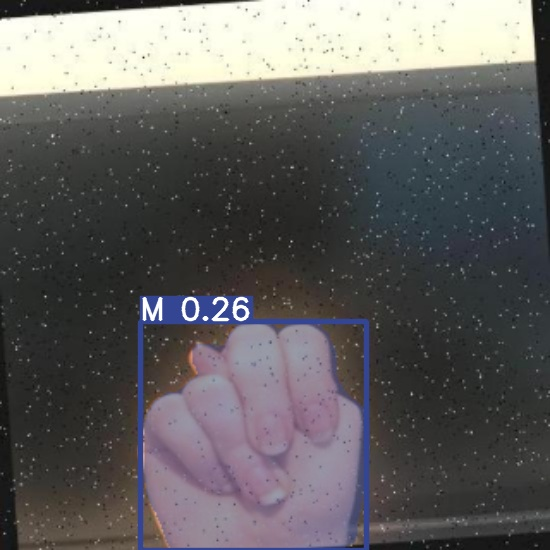

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 320 --weights {HOME}/yolov5/runs/train-seg/custom-dataset/weights/best.pt --source {example_image_path} --name custom-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/custom-dataset/{example_image_name}", width=600)

The image above shows the resulting prediction overlayed on the input image.

***The model predicted that the sign language was a letter M with a confidence level of 0.36, this would mean that the model was unable to correctly predict the sign language as it is in fact a letter N.***

## (OPTIONAL) Improve Our Model with Active Learning

Now that we've trained our model once, we will want to continue to improve its performance. Improvement is largely dependent on improving our dataset.

We can programmatically upload example failure images back to our custom dataset based on conditions (like seeing an underrpresented class or a low confidence score) using the same `pip` package.

In [ ]:
#Prepare Our Example Image Directory
#To run on your own images, replace the directory on the line below with a
#directory you provide (by uploading to the colab environment, for example)
example_image_dir = "../example_images"

#We are going to download example images from the web for the purposes of this
#demo. These images are relevant to the ASL Poly dataset. Skip the rest of this
#cell if you are providing your own example image directory.
os.makedirs(example_image_dir, exist_ok=True)
image_urls = [
    "https://i.imgur.com/rFsDnHC.jpg",
    "https://i.imgur.com/aEcceXm.jpg",
    "https://i.imgur.com/s4N63fx.jpg",
    ]

for i, image_url in enumerate(image_urls):
    response = requests.get(image_url)
    response.raise_for_status()
    with open(os.path.join(example_image_dir,f'example_{i}.jpg'), 'wb') as handler:
        handler.write(response.content)

In [ ]:
#Infer On Directory
!python segment/predict.py --img 320 --weights runs/train-seg/exp/weights/best.pt --source {example_image_dir} --save-txt --save-conf

segment/predict: weights=['runs/train-seg/exp/weights/best.pt'], source=../example_images, data=data/coco128.yaml, imgsz=[320, 320], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/predict-seg, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5 🚀 v7.0-295-gac6c4383 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov5/segment/predict.py", line 306, in <module>
    main(opt)
  File "/content/yolov5/segment/predict.py", line 301, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov5/segment/predict.py", line 115, in run

In [ ]:
#Read Results Files and Conditionally Upload

#If my model has a confidence of less than 80% for a prediction, let's help it
#out by uploading this image back to our dataset. Then we can add a ground truth
#label to it so that it will be included in our next training run and future
#prediction results will improve.
MIN_CONF_THRESHOLD = 0.8

for i,txt_file in enumerate(os.listdir("runs/predict-seg/exp3/labels")):
  with open(os.path.join("runs/predict-seg/exp3/labels",txt_file), 'r') as fid:
    for line in fid:
      label, x1, y1, x2, y2, conf = line.split(" ")
      conf = float(conf)
      if conf < MIN_CONF_THRESHOLD:
        print(f"Image has a low confidence prediction, uploading to project: example_{i}.jpg")
        #Upload via Roboflow pip package
        project.upload(os.path.join(example_image_dir,f'example_{i}.jpg'))
        break

FileNotFoundError: [Errno 2] No such file or directory: 'runs/predict-seg/exp3/labels'

<br><br><br>

# Supplementary Activity

In [ ]:
%cd {HOME}/yolov5
#!pip install roboflow

from roboflow import Roboflow
# rf = Roboflow(api_key="YOUR API KEY")
rf = Roboflow(api_key="V1enjxaNhwJarLPxQFSQ")

project = rf.workspace("ed-mikael-bebic-iyvku").project("thesis-efjq4")
dataset = project.version(20).download("yolov5")

c:\Users\Nil\VscodeProjects\My_yolo\yolov5
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Thesis-20 in yolov5pytorch:: 100%|██████████| 3000/3000 [00:01<00:00, 1959.96it/s]


In [ ]:
# Use on Colab
#%cat {dataset.location}/data.yaml

# Use on local Machine
with open(f'{dataset.location}/data.yaml', 'r') as file:
    lables = file.read()
print(lables)

names:
- can
- paper
- plastic bottle
nc: 3
roboflow:
  license: CC BY 4.0
  project: thesis-efjq4
  url: https://universe.roboflow.com/ed-mikael-bebic-iyvku/thesis-efjq4/dataset/20
  version: 20
  workspace: ed-mikael-bebic-iyvku
test: ../test/images
train: Thesis-20/train/images
val: Thesis-20/valid/images



c:\Users\Nil\VscodeProjects\My_yolo\yolov5


segment\train: weights=yolov5s-seg.pt, cfg=, data=c:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20/data.yaml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=60, batch_size=128, imgsz=128, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs\train-seg, name=container-dataset, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, mask_ratio=4, no_overlap=False
github: up to date with https://github.com/ultralytics/yolov5 
YOLOv5  v7.0-295-gac6c4383 Python-3.12.2 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t

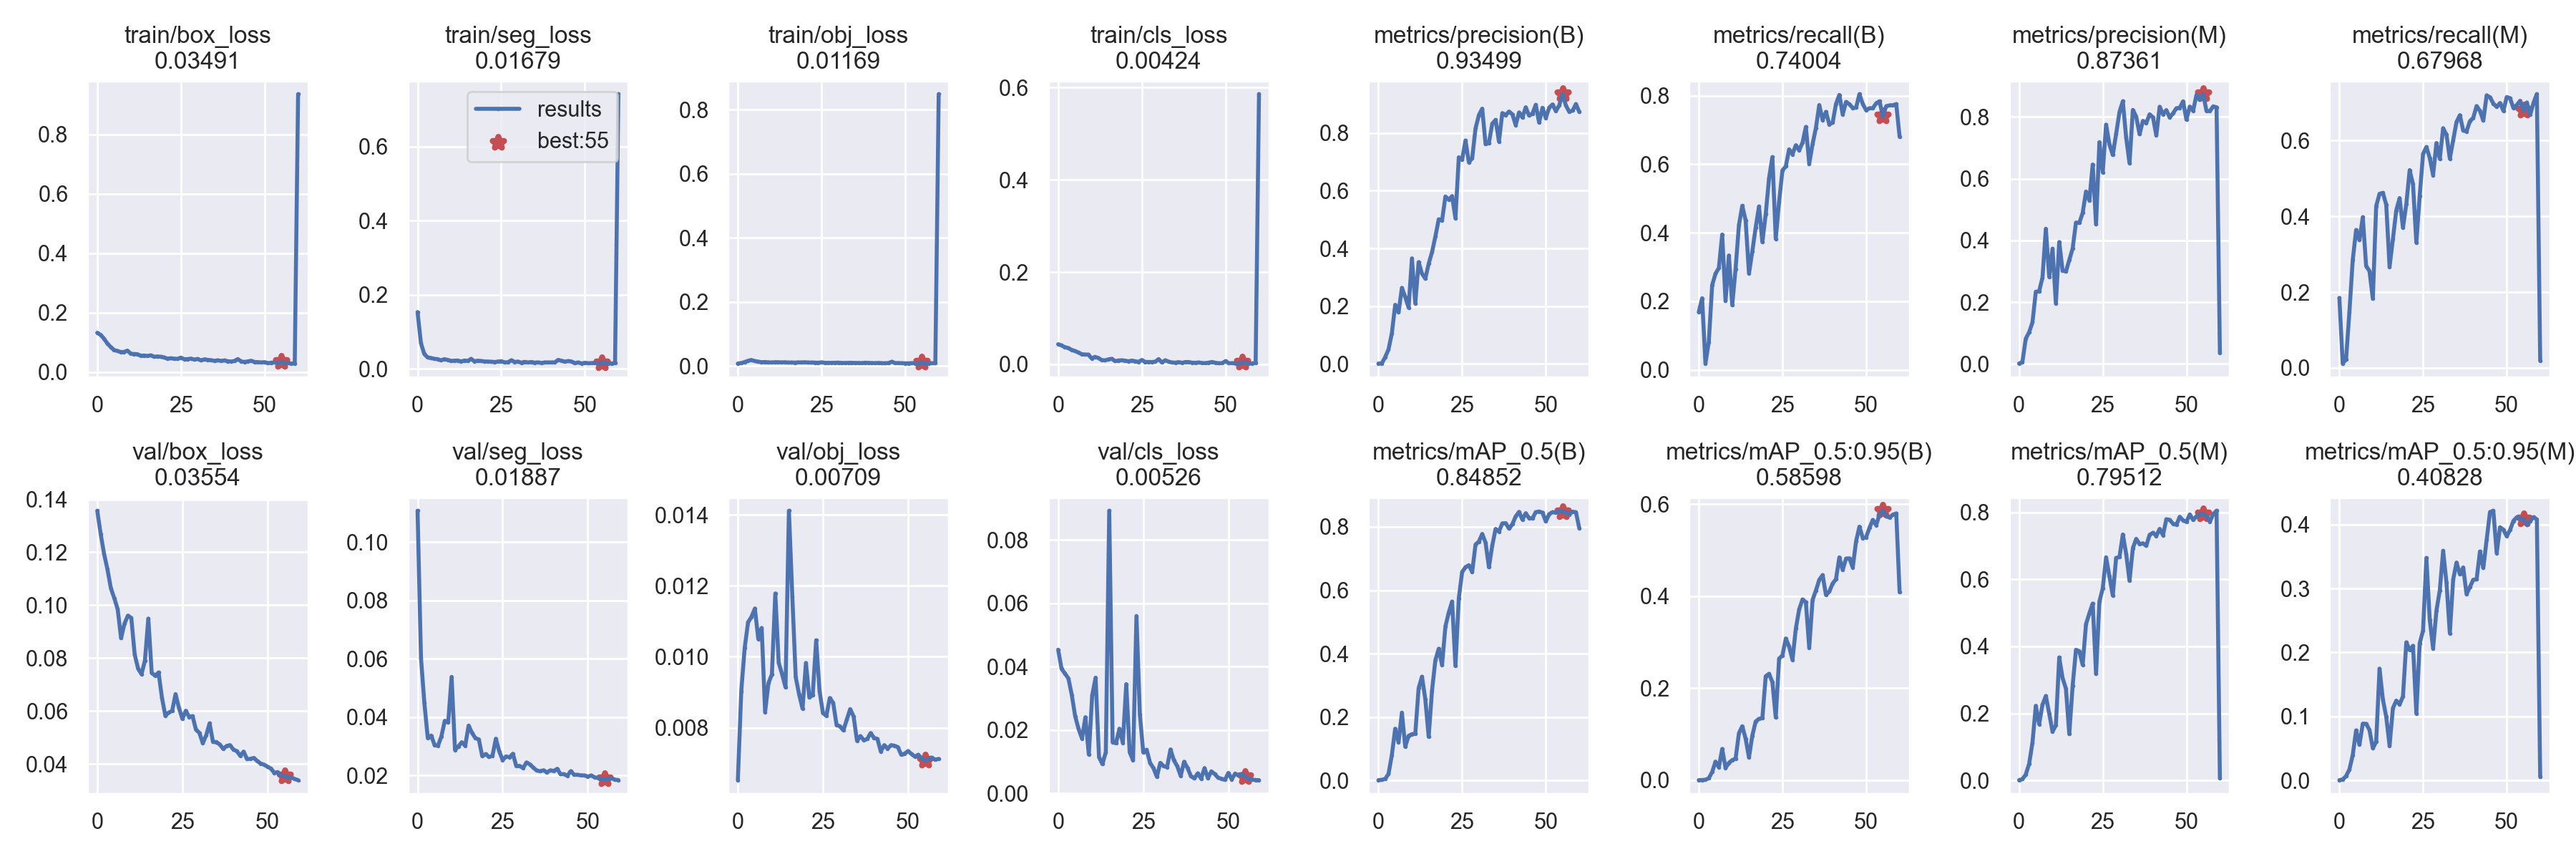

In [ ]:
%cd {HOME}/yolov5
!python segment/train.py --img 128 --batch 128 --epochs 60 --data {dataset.location}/data.yaml --weights yolov5s-seg.pt --name container-dataset
display.Image(filename=f'{HOME}/yolov5/runs/train-seg/container-dataset/results.png', width=1200)

***The model showed a better result than the previous model, it was able to achieve a higher score of 85% in the mAP with a threshold of 0.5***

In [ ]:
%cd {HOME}/yolov5
!python segment/val.py --weights {HOME}/yolov5/runs/train-seg/container-dataset/weights/best.pt --data {dataset.location}/data.yaml --img 128  --name container-dataset

c:\Users\Nil\VscodeProjects\My_yolo\yolov5


segment\val: data=c:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20/data.yaml, weights=['c:\\Users\\Nil\\VscodeProjects\\My_yolo/yolov5/runs/train-seg/container-dataset/weights/best.pt'], batch_size=32, imgsz=128, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs\val-seg, name=container-dataset, exist_ok=False, half=False, dnn=False
YOLOv5  v7.0-295-gac6c4383 Python-3.12.2 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs

val: Scanning C:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\valid\labels.cache... 153 images, 0 backgrounds, 0 corrupt: 100%|██████████| 153/153 [00:00<?, ?it/s]
val: Scanning C:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\valid\labels.cache... 153 images, 0 backgrounds, 0 corrupt: 100%|███████

c:\Users\Nil\VscodeProjects\My_yolo\yolov5


segment\predict: weights=['c:\\Users\\Nil\\VscodeProjects\\My_yolo/yolov5/runs/train-seg/container-dataset/weights/best.pt'], source=c:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\test\images\-109_jpg.rf.d6d11a408bc2c05ae3b26f72935d69c7.jpg, data=data\coco128.yaml, imgsz=[128, 128], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=container-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-295-gac6c4383 Python-3.12.2 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 C:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\test\images\-109_jpg.rf.d6d11a408bc2c05ae3b26f72935d69c7.j

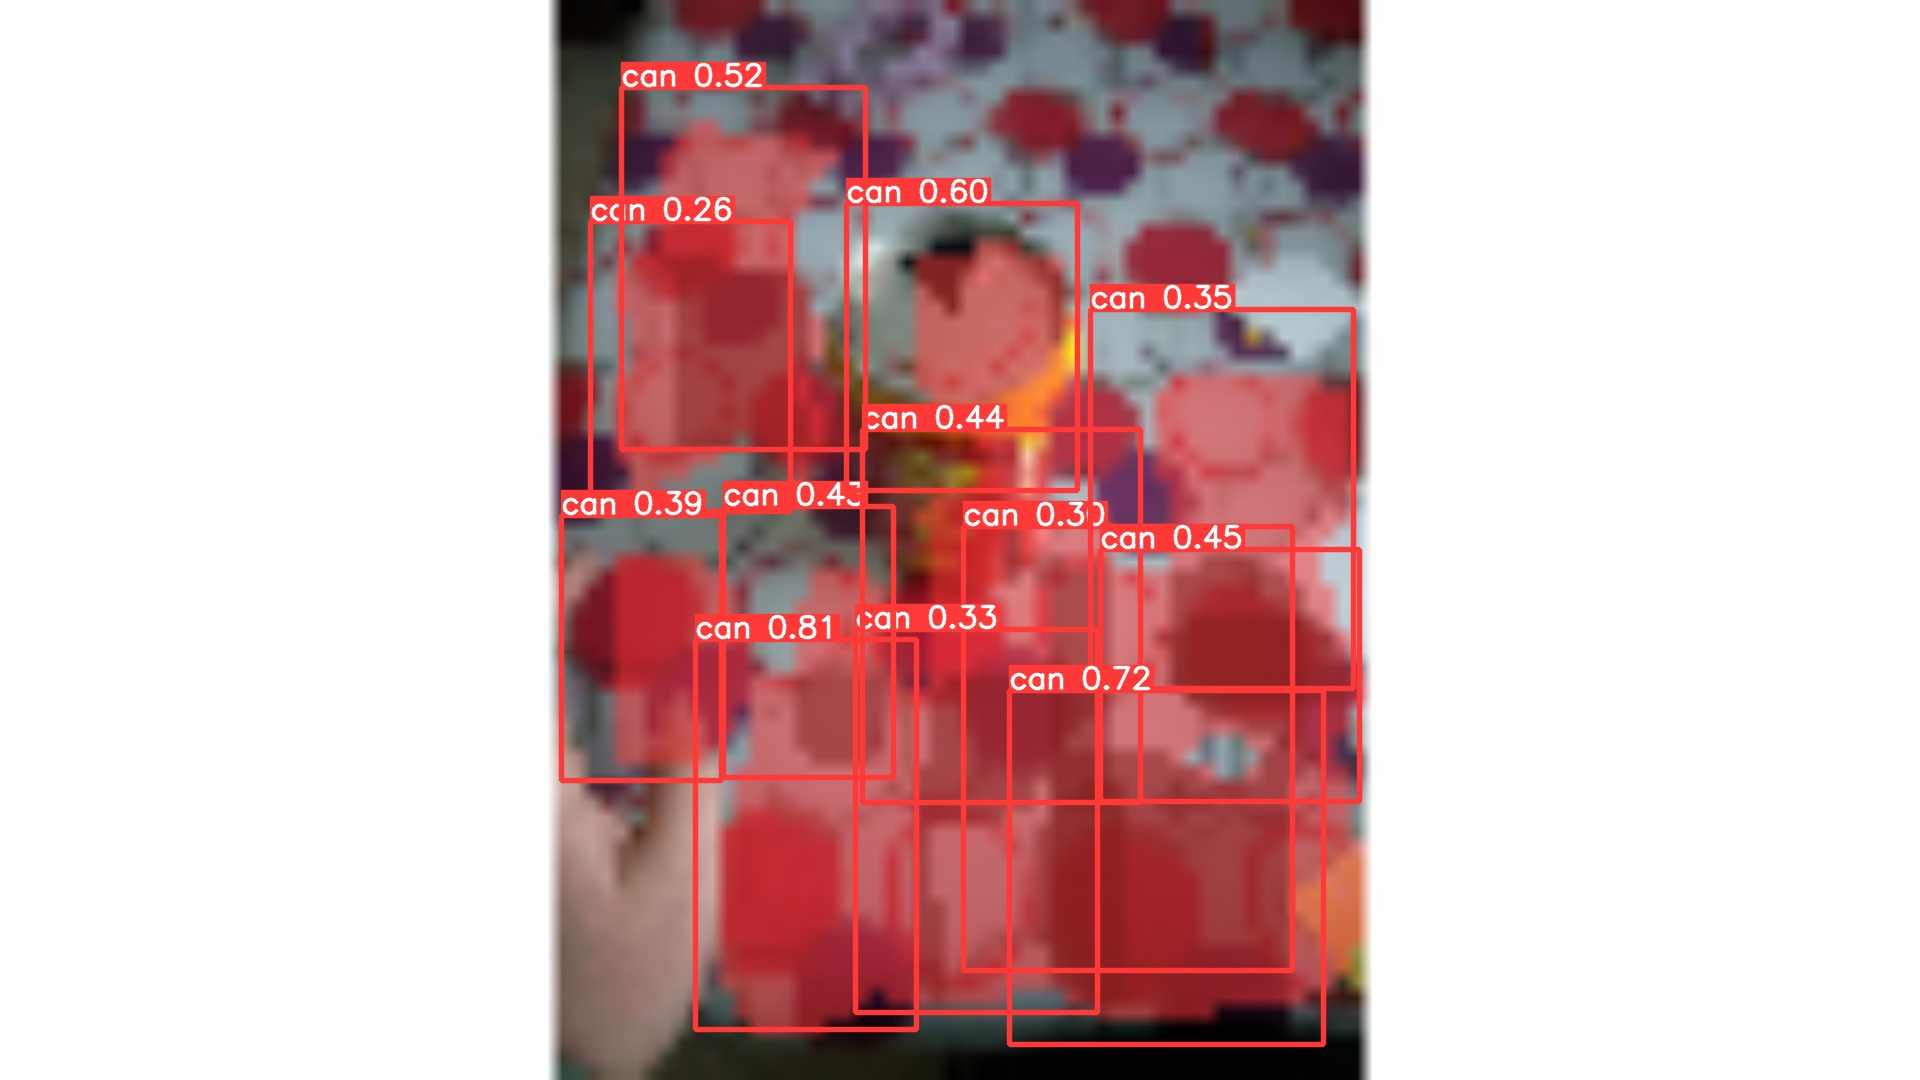

In [ ]:
import os

if os.path.exists(os.path.join(dataset.location, "test")):
    split_path = os.path.join(dataset.location, "test", "images")
else:
    split_path = os.path.join(dataset.location, "valid", "images")
example_image_name = os.listdir(split_path)[0]
example_image_path = os.path.join(split_path, example_image_name)

%cd {HOME}/yolov5
!python segment/predict.py --img 128 --weights {HOME}/yolov5/runs/train-seg/container-dataset/weights/best.pt --source {example_image_path} --name container-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/container-dataset/{example_image_name}", width=600)

segment\predict: weights=['c:\\Users\\Nil\\VscodeProjects\\My_yolo/yolov5/runs/train-seg/container-dataset/weights/best.pt'], source=C:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\from_net.jpg, data=data\coco128.yaml, imgsz=[128, 128], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs\predict-seg, name=container-dataset, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1, retina_masks=False
YOLOv5  v7.0-295-gac6c4383 Python-3.12.2 torch-2.2.2 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 4096MiB)

Fusing layers... 
Model summary: 165 layers, 7403816 parameters, 0 gradients, 25.7 GFLOPs
image 1/1 C:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\from_net.jpg: 128x96 1 can, 312.6ms
Speed: 0.9ms pre-process, 312.6ms inference, 191.7ms NMS per image at 

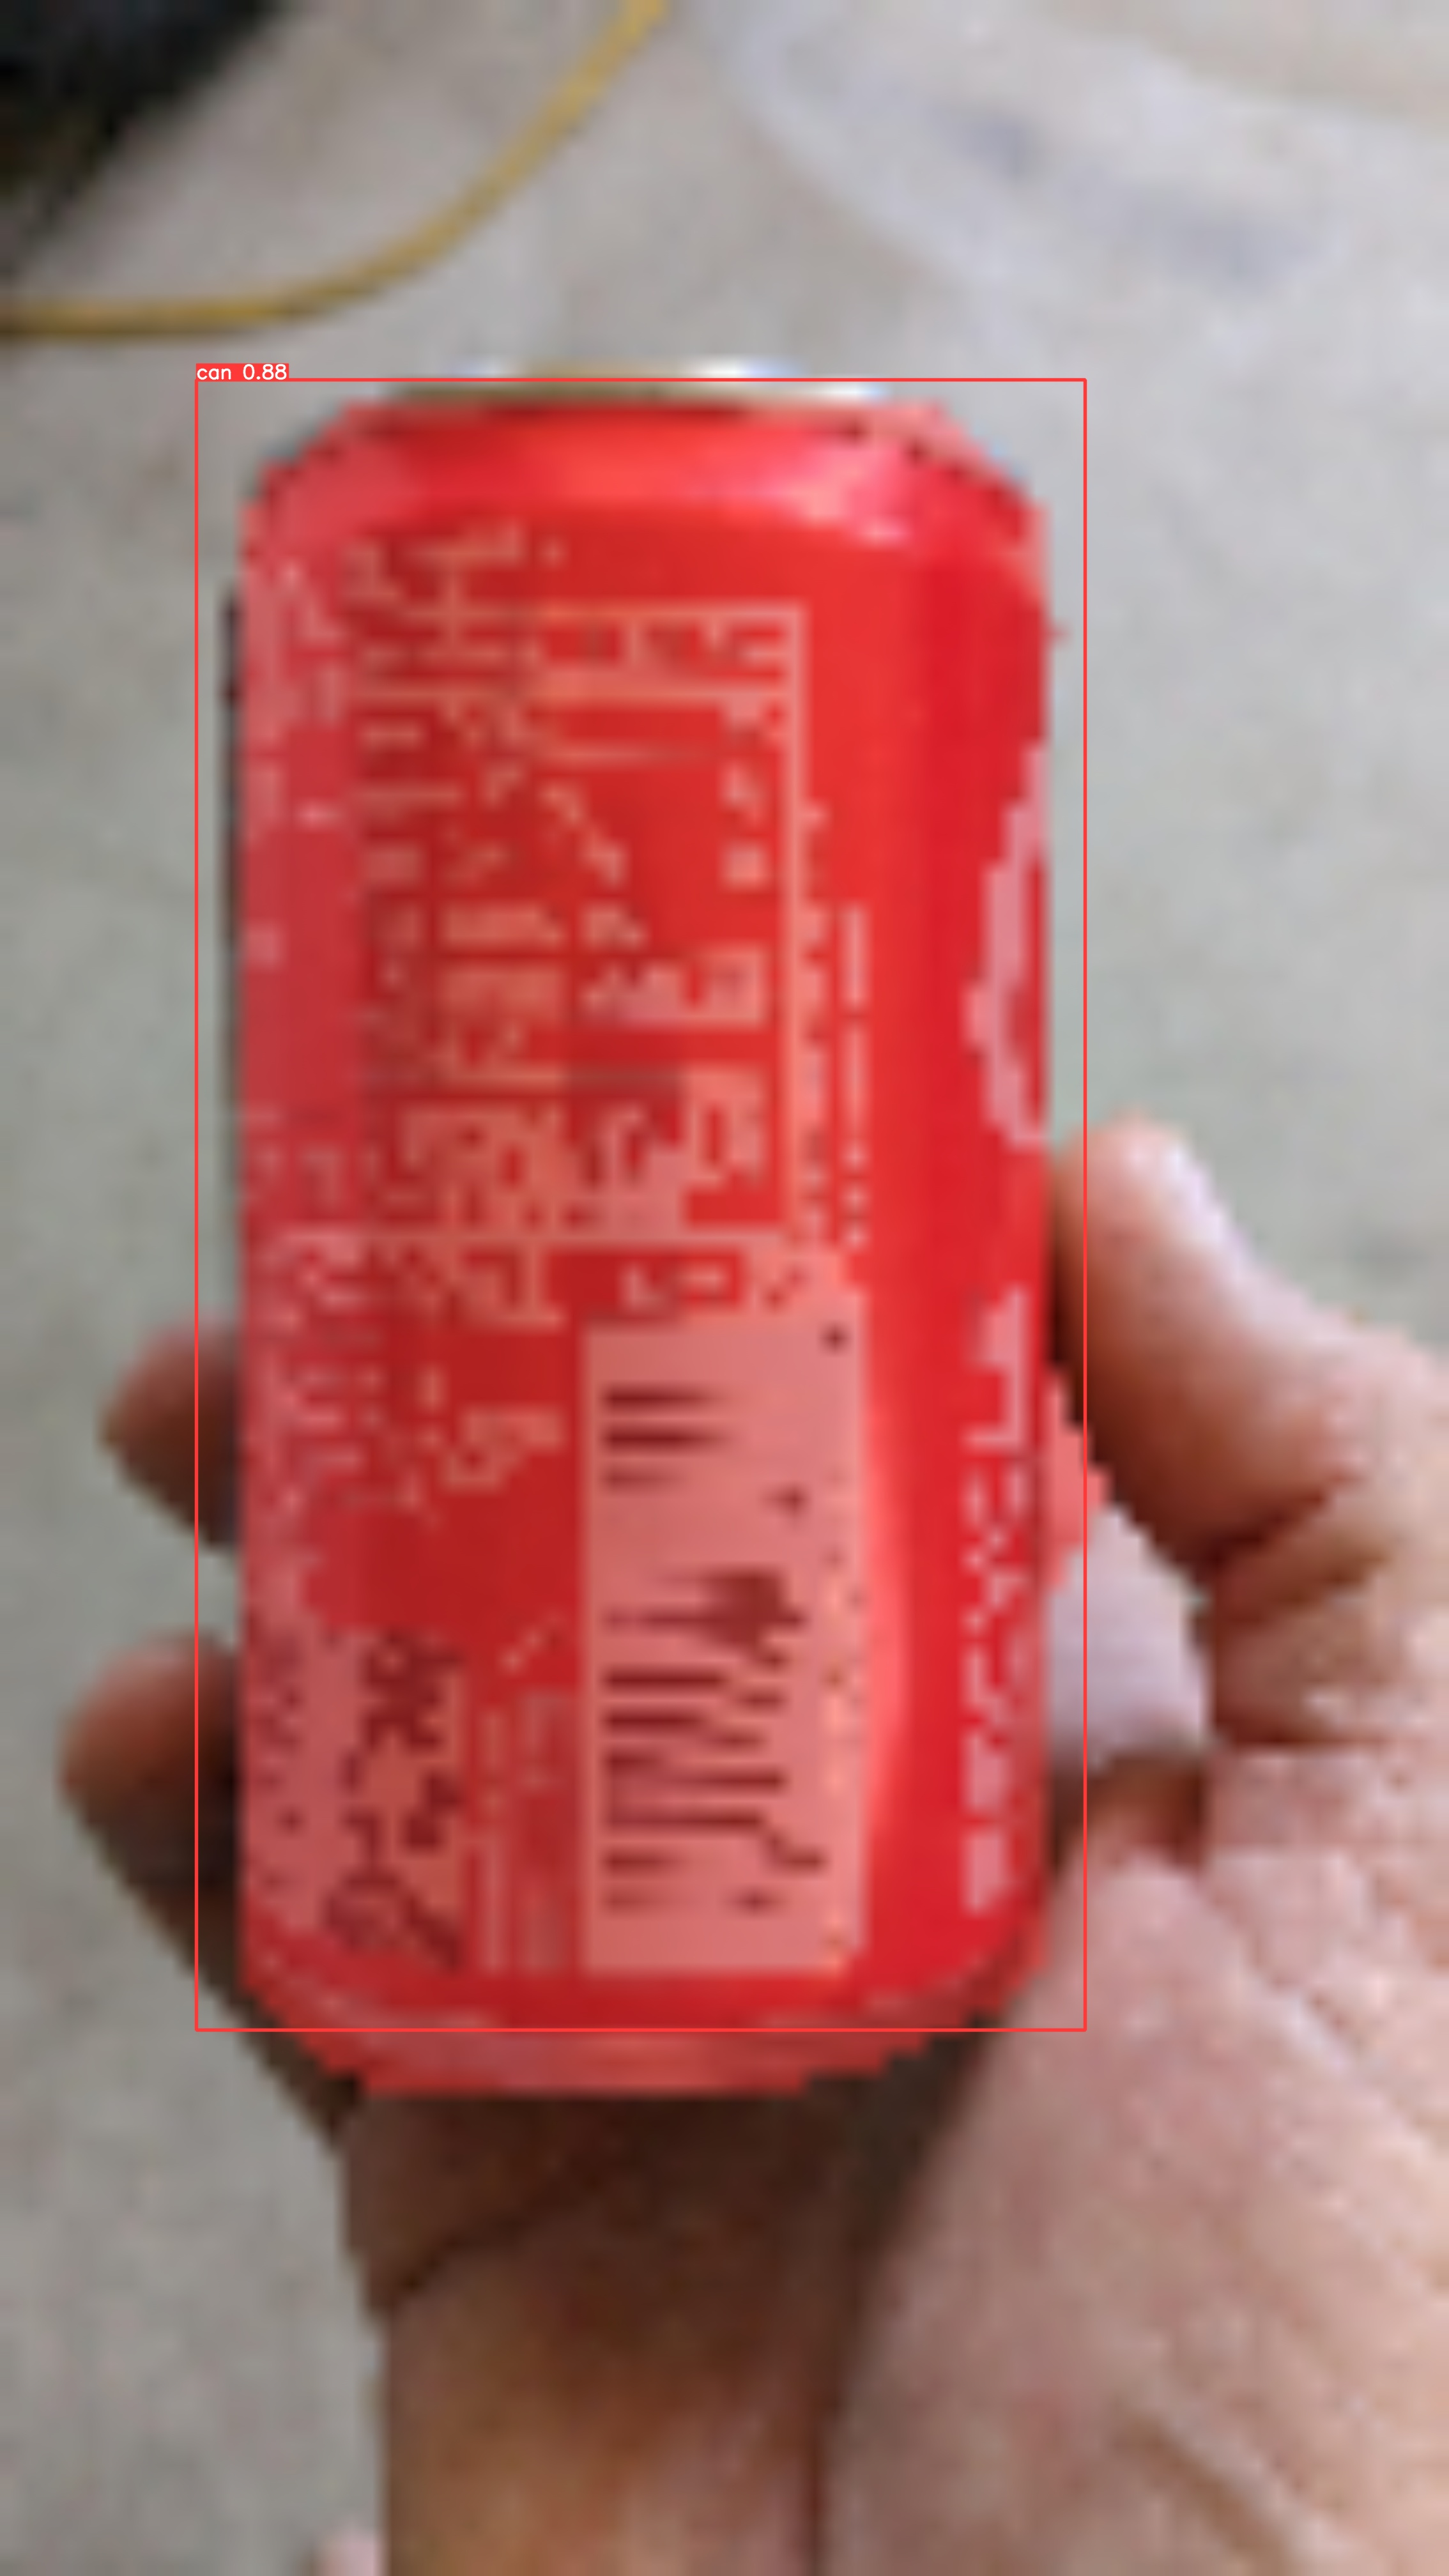

In [ ]:
## Try on image from the internet

img_from_net = "from_net.jpg"
img_from_net_source = r"C:\Users\Nil\VscodeProjects\My_yolo\yolov5\Thesis-20\from_net.jpg"

!python segment/predict.py --img 128 --weights {HOME}/yolov5/runs/train-seg/container-dataset/weights/best.pt --source {img_from_net_source} --name container-dataset
display.Image(filename=f"{HOME}/yolov5/runs/predict-seg/container-dataset2/{img_from_net}", width=600)

***The model predicted that the object is a can which is correct since it is a coca-cola can, having a high confidence level of 88%***